 <a href="https://colab.research.google.com/github/marcpalo1999/MIA_sanidad/blob/main/2_1_introduccion_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Setup - copy data from github to collab



In [2]:
import os
if not os.path.exists('../MIA_sanidad'):
    !git clone https://github.com/marcpalo1999/MIA_sanidad.git
os.chdir('../MIA_sanidad')


 # Introducción a Pandas con un Dataset Médico



 En este notebook vamos a aprender a usar `pandas` para:



 1. Cargar un dataset en un DataFrame

 2. Inspeccionar datos (ver filas, columnas, tipos)

 3. Seleccionar y filtrar datos

 4. Crear y transformar columnas

 5. Hacer una exploración inicial básica

 6. Trabajar con valores nulos

 7. Agrupar y resumir información

 8. Visualización básica con pandas

 9. Guardar los resultados



In [83]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
# Cargar el dataset
df = pd.read_csv("./data/heart_disease_dataset.csv")

# También podríamos cargar desde una URL directamente:
# df = pd.read_csv("https://ejemplo.com/datos.csv")

# O desde Excel:
# df = pd.read_excel("datos.xlsx")


 ## Contexto del dataset



 Origen: https://archive.ics.uci.edu/dataset/45/heart+disease



 Este dataset contiene información médica de pacientes y su relación con enfermedades cardíacas.

 Las principales variables son:



 - `age`: Edad del paciente

 - `sex`: Sexo (0 = Mujer, 1 = Hombre)

 - `cp`: Tipo de dolor en el pecho (1-4)

 - `trestbps`: Presión arterial en reposo (mm Hg)

 - `chol`: Colesterol sérico en mg/dl

 - `fbs`: Glucosa en ayunas > 120 mg/dl (1 = verdadero; 0 = falso)

 - `restecg`: Resultados electrocardiográficos en reposo

 - `thalach`: Frecuencia cardíaca máxima alcanzada

 - `exang`: Angina inducida por ejercicio (1 = sí; 0 = no)

 - `oldpeak`: Depresión ST inducida por ejercicio

 - `slope`: Pendiente del segmento ST

 - `ca`: Número de vasos principales coloreados por fluoroscopia (0-3)

 - `thal`: 3 = normal; 6 = defecto fijo; 7 = defecto reversible

 - `num`: Diagnóstico de enfermedad cardíaca (0 = No, 1-4 = Sí)

 ## 1. Inspección básica del DataFrame



 Lo primero que hacemos siempre es conocer nuestros datos.

In [85]:
# Ver las primeras filas
print("Primeras 5 filas del dataset:")
df.head()


Primeras 5 filas del dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [86]:
# También podemos ver las últimas filas
print("Últimas 3 filas:")
df.tail(3)


Últimas 3 filas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [87]:
# Ver una muestra aleatoria de datos
print("Muestra aleatoria de 5 filas:")
df.sample(5)


Muestra aleatoria de 5 filas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
263,44,1,3,120,226,0,0,169,0,0.0,1,0.0,3.0,0
15,57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0
40,65,0,4,150,225,0,2,114,0,1.0,2,3.0,7.0,4
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
81,53,0,4,130,264,0,2,143,0,0.4,2,0.0,3.0,0


In [88]:
# Dimensiones del DataFrame
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"Dimensiones: {df.shape}")


El dataset tiene 303 filas y 14 columnas
Dimensiones: (303, 14)


In [89]:
# Ver los nombres de las columnas
print("Columnas disponibles:")
print(df.columns)


Columnas disponibles:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [90]:
# Tipos de datos de cada columna
print("Tipos de datos:")
print(df.dtypes)


Tipos de datos:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


In [91]:
# Información general del DataFrame
# Esto es muy útil para ver tipos y valores nulos de un vistazo
print("Información general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [92]:
# Resumen estadístico rápido
print("Estadísticas descriptivas básicas:")
df.describe()


Estadísticas descriptivas básicas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [93]:
# También podemos incluir variables categóricas
print("Estadísticas incluyendo todas las columnas:")
df.describe(include='all')


Estadísticas incluyendo todas las columnas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


 ## 2. Seleccionar columnas y filas



 Pandas ofrece varias formas de acceder a los datos.

In [94]:
# Seleccionar una columna (devuelve una Serie)
print("Edades de los primeros 10 pacientes:")
print(df["age"].head(10))


Edades de los primeros 10 pacientes:
0    63
1    67
2    67
3    37
4    41
5    56
6    62
7    57
8    63
9    53
Name: age, dtype: int64


In [95]:
# Otra forma de seleccionar una columna (notación de punto)
# Nota: solo funciona si el nombre no tiene espacios
print("Primeros valores de colesterol:")
print(df.chol.head())


Primeros valores de colesterol:
0    233
1    286
2    229
3    250
4    204
Name: chol, dtype: int64


In [96]:
# Seleccionar varias columnas (devuelve un DataFrame)
subset = df[["age", "sex", "chol", "num"]]
print("Subconjunto de columnas:")
subset.head()


Subconjunto de columnas:


,age,sex,chol,num
0,63,1,233,0
1,67,1,286,2
2,67,1,229,1
3,37,1,250,0
4,41,0,204,0


In [97]:
# Seleccionar filas por posición con iloc
print("Primera fila (índice 0):")
print(df.iloc[0])


Primera fila (índice 0):
age          63.0
sex           1.0
cp            1.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       2.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         3.0
ca            0.0
thal          6.0
num           0.0
Name: 0, dtype: float64


In [98]:
# Seleccionar un rango de filas
print("Filas 5 a 10:")
df.iloc[5:10]


Filas 5 a 10:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [99]:
# Seleccionar filas y columnas específicas con iloc
print("Primeras 3 filas y primeras 4 columnas:")
df.iloc[0:3, 0:4]


Primeras 3 filas y primeras 4 columnas:


,age,sex,cp,trestbps
0,63,1,1,145
1,67,1,4,160
2,67,1,4,120


In [100]:
# Seleccionar con loc usando etiquetas (útil cuando el índice no es numérico)
# En este caso el índice es numérico, pero loc incluye el último valor
print("Filas 0 a 2 con columnas específicas:")
df.loc[0:2, ["age", "sex", "chol"]]


Filas 0 a 2 con columnas específicas:


,age,sex,chol
0,63,1,233
1,67,1,286
2,67,1,229


 ## 3. Filtrar datos



 Una de las operaciones más comunes es filtrar filas según condiciones.

In [101]:
# Filtrar pacientes mayores de 60 años
mayores_60 = df[df["age"] > 60]
print(f"Pacientes mayores de 60 años: {len(mayores_60)}")
mayores_60.head()


Pacientes mayores de 60 años: 79


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [102]:
# Filtrar con múltiples condiciones
# Mujeres mayores de 50 años
mujeres_mayores = df[(df["sex"] == 0) & (df["age"] > 50)]
print(f"Mujeres mayores de 50 años: {len(mujeres_mayores)}")
mujeres_mayores.head()


Mujeres mayores de 50 años: 70


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
11,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
21,58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
26,58,0,3,120,340,0,0,172,0,0.0,1,0.0,3.0,0


In [103]:
# Usar el operador OR (|)
# Pacientes con colesterol alto o presión alta
alto_riesgo = df[(df["chol"] > 240) | (df["trestbps"] > 140)]
print(f"Pacientes de alto riesgo: {len(alto_riesgo)}")


Pacientes de alto riesgo: 181


In [104]:
# Filtrar usando isin() para múltiples valores
# Pacientes con dolor de pecho tipo 1 o 2
dolor_especifico = df[df["cp"].isin([1, 2])]
print(f"Pacientes con dolor tipo 1 o 2: {len(dolor_especifico)}")


Pacientes con dolor tipo 1 o 2: 73


In [105]:
# Filtrar usando query() - más legible para condiciones complejas
resultado = df.query("age > 50 and chol > 200 and sex == 1")
print(f"Hombres mayores de 50 con colesterol > 200: {len(resultado)}")
resultado.head()


Hombres mayores de 50 con colesterol > 200: 120


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


 ## 4. Crear y modificar columnas



 Es común necesitar crear nuevas variables o transformar las existentes.

In [106]:
# Crear una columna simple
df["edad_en_meses"] = df["age"] * 12
print("Nueva columna creada:")
df[["age", "edad_en_meses"]].head()


Nueva columna creada:


,age,edad_en_meses
0,63,756
1,67,804
2,67,804
3,37,444
4,41,492


In [107]:
# Crear columna con operaciones entre columnas
# Índice simple de riesgo cardiovascular
df["indice_riesgo"] = df["chol"] / df["age"]
df[["age", "chol", "indice_riesgo"]].head()


,age,chol,indice_riesgo
0,63,233,3.698413
1,67,286,4.268657
2,67,229,3.417910
3,37,250,6.756757
4,41,204,4.975610


In [108]:
# Crear columna categórica basada en valores continuos
# Categorizar edad en grupos
df["grupo_edad"] = pd.cut(df["age"], 
                          bins=[0, 40, 50, 60, 70, 100],
                          labels=["<40", "40-49", "50-59", "60-69", "70+"])
print("Distribución por grupos de edad:")
print(df["grupo_edad"].value_counts())


Distribución por grupos de edad:
grupo_edad
50-59    130
40-49     76
60-69     73
<40       18
70+        6
Name: count, dtype: int64


In [109]:
# Usar apply() para transformaciones más complejas
def clasificar_colesterol(valor):
    if pd.isna(valor):
        return "Desconocido"
    elif valor < 200:
        return "Normal"
    elif valor < 240:
        return "Límite alto"
    else:
        return "Alto"

df["categoria_colesterol"] = df["chol"].apply(clasificar_colesterol)
print("Categorías de colesterol:")
print(df["categoria_colesterol"].value_counts())


Categorías de colesterol:
categoria_colesterol
Alto           156
Límite alto     98
Normal          49
Name: count, dtype: int64


In [110]:
# Crear columna usando numpy.where (más eficiente para condiciones simples)
df["sexo_texto"] = np.where(df["sex"] == 0, "Mujer", "Hombre")
df[["sex", "sexo_texto"]].head()


,sex,sexo_texto
0,1,Hombre
1,1,Hombre
2,1,Hombre
3,1,Hombre
4,0,Mujer


In [111]:
# Mapear valores usando un diccionario
mapeo_enfermedad = {0: "Sin enfermedad", 1: "Leve", 2: "Moderada", 3: "Severa", 4: "Muy severa"}
df["nivel_enfermedad"] = df["num"].map(mapeo_enfermedad)
df[["num", "nivel_enfermedad"]].head(10)


,num,nivel_enfermedad
0,0,Sin enfermedad
1,2,Moderada
2,1,Leve
3,0,Sin enfermedad
4,0,Sin enfermedad
5,0,Sin enfermedad
6,3,Severa
7,0,Sin enfermedad
8,2,Moderada
9,1,Leve


In [112]:
# Modificar columna existente
# Normalizar el colesterol (escala 0-1)
df["chol_normalizado"] = (df["chol"] - df["chol"].min()) / (df["chol"].max() - df["chol"].min())
df[["chol", "chol_normalizado"]].describe()


,chol,chol_normalizado
count,303.000000,303.000000
mean,246.693069,0.275555
std,51.776918,0.118212
min,126.000000,0.000000
25%,211.000000,0.194064
50%,241.000000,0.262557
75%,275.000000,0.340183
max,564.000000,1.000000


 ## 5. Exploración y análisis básico



 Vamos a explorar los datos para entender mejor el dataset.

In [113]:
# Contar valores únicos en una columna
print("Valores únicos en 'num' (diagnóstico):")
print(df["num"].value_counts())


Valores únicos en 'num' (diagnóstico):
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [114]:
# Porcentajes en lugar de conteos
print("\nPorcentaje de pacientes por diagnóstico:")
print(df["num"].value_counts(normalize=True) * 100)



Porcentaje de pacientes por diagnóstico:
num
0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: proportion, dtype: float64


In [115]:
# Tabla cruzada entre dos variables
print("Tabla cruzada: Sexo vs Diagnóstico")
tabla = pd.crosstab(df["sexo_texto"], df["nivel_enfermedad"])
print(tabla)


Tabla cruzada: Sexo vs Diagnóstico
nivel_enfermedad  Leve  Moderada  Muy severa  Severa  Sin enfermedad
sexo_texto                                                          
Hombre              46        29          11      28              92
Mujer                9         7           2       7              72


In [119]:
# Tabla cruzada con porcentajes por fila
print("\nPorcentajes por sexo:")
tabla_pct = pd.crosstab(df["sexo_texto"], df["nivel_enfermedad"], normalize=0) * 100
print(tabla_pct.round(1))



Porcentajes por sexo:
nivel_enfermedad  Leve  Moderada  Muy severa  Severa  Sin enfermedad
sexo_texto                                                          
Hombre            22.3      14.1         5.3    13.6            44.7
Mujer              9.3       7.2         2.1     7.2            74.2


In [120]:
# Tabla cruzada con porcentajes por fila
print("\nPorcentajes por sexo:")
tabla_pct = pd.crosstab(df["sexo_texto"], df["nivel_enfermedad"], normalize=1) * 100
print(tabla_pct.round(1))



Porcentajes por sexo:
nivel_enfermedad  Leve  Moderada  Muy severa  Severa  Sin enfermedad
sexo_texto                                                          
Hombre            83.6      80.6        84.6    80.0            56.1
Mujer             16.4      19.4        15.4    20.0            43.9


 ## 6. Trabajar con valores nulos



 El manejo de valores faltantes es crucial en el análisis de datos.

In [121]:
# Detectar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
age                     0
sex                     0
cp                      0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalach                 0
exang                   0
oldpeak                 0
slope                   0
ca                      4
thal                    2
num                     0
edad_en_meses           0
indice_riesgo           0
grupo_edad              0
categoria_colesterol    0
sexo_texto              0
nivel_enfermedad        0
chol_normalizado        0
dtype: int64


In [122]:
# Porcentaje de valores nulos
print("\nPorcentaje de valores nulos:")
print((df.isnull().sum() / len(df)) * 100)



Porcentaje de valores nulos:
age                     0.000000
sex                     0.000000
cp                      0.000000
trestbps                0.000000
chol                    0.000000
fbs                     0.000000
restecg                 0.000000
thalach                 0.000000
exang                   0.000000
oldpeak                 0.000000
slope                   0.000000
ca                      1.320132
thal                    0.660066
num                     0.000000
edad_en_meses           0.000000
indice_riesgo           0.000000
grupo_edad              0.000000
categoria_colesterol    0.000000
sexo_texto              0.000000
nivel_enfermedad        0.000000
chol_normalizado        0.000000
dtype: float64


In [123]:
# Filas con algún valor nulo
filas_con_nulos = df[df.isnull().any(axis=1)]
print(f"Filas con al menos un valor nulo: {len(filas_con_nulos)}")
filas_con_nulos.head()


Filas con al menos un valor nulo: 6


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,num,edad_en_meses,indice_riesgo,grupo_edad,categoria_colesterol,sexo_texto,nivel_enfermedad,chol_normalizado
87,53,0,3,128,216,0,2,115,0,0.0,...,0.0,NaN,0,636,4.075472,50-59,Límite alto,Mujer,Sin enfermedad,0.205479
166,52,1,3,138,223,0,0,169,0,0.0,...,NaN,3.0,0,624,4.288462,50-59,Límite alto,Hombre,Sin enfermedad,0.221461
192,43,1,4,132,247,1,2,143,1,0.1,...,NaN,7.0,1,516,5.744186,40-49,Alto,Hombre,Leve,0.276256
266,52,1,4,128,204,1,0,156,1,1.0,...,0.0,NaN,2,624,3.923077,50-59,Límite alto,Hombre,Moderada,0.178082
287,58,1,2,125,220,0,0,144,0,0.4,...,NaN,7.0,0,696,3.793103,50-59,Límite alto,Hombre,Sin enfermedad,0.214612


In [124]:
# Diferentes estrategias para tratar nulos

# Crear una copia para no modificar el original
df_limpio = df.copy()

# Opción 1: Eliminar filas con nulos
df_sin_nulos = df_limpio.dropna()
print(f"Filas antes de eliminar nulos: {len(df_limpio)}")
print(f"Filas después de eliminar nulos: {len(df_sin_nulos)}")


Filas antes de eliminar nulos: 303
Filas después de eliminar nulos: 297


In [125]:
# Opción 2: Rellenar con un valor específico
df_limpio["ca"] = df_limpio["ca"].fillna(0)

# Opción 3: Rellenar con la media (para variables numéricas)
df_limpio["thal"] = df_limpio["thal"].fillna(df_limpio["thal"].mean())

# Opción 4: Rellenar con la moda (para categóricas)
df_limpio["slope"] = df_limpio["slope"].fillna(df_limpio["slope"].mode()[0])

# Opción 5: Rellenar con el valor anterior (forward fill)
# df_limpio["columna"] = df_limpio["columna"].fillna(method='ffill')

print("Valores nulos después del tratamiento:")
print(df_limpio.isnull().sum())


Valores nulos después del tratamiento:
age                     0
sex                     0
cp                      0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalach                 0
exang                   0
oldpeak                 0
slope                   0
ca                      0
thal                    0
num                     0
edad_en_meses           0
indice_riesgo           0
grupo_edad              0
categoria_colesterol    0
sexo_texto              0
nivel_enfermedad        0
chol_normalizado        0
dtype: int64


 ## 7. Agrupar y resumir datos



 La agrupación es fundamental para obtener estadísticas por categorías.

In [126]:
# Agrupar por una variable y calcular media
print("Edad media por sexo:")
print(df.groupby("sexo_texto")["age"].mean())


Edad media por sexo:
sexo_texto
Hombre    53.834951
Mujer     55.721649
Name: age, dtype: float64


In [127]:
# Múltiples estadísticas a la vez
print("\nEstadísticas de colesterol por sexo:")
print(df.groupby("sexo_texto")["chol"].agg(["mean", "median", "std", "min", "max"]))



Estadísticas de colesterol por sexo:
                  mean  median        std  min  max
sexo_texto                                         
Hombre      239.601942   235.0  42.649757  126  353
Mujer       261.752577   254.0  64.900891  141  564


In [128]:
# Agrupar por múltiples variables
print("\nEdad media por sexo y diagnóstico:")
grupo = df.groupby(["sexo_texto", "nivel_enfermedad"])["age"].mean()
print(grupo.round(1))



Edad media por sexo y diagnóstico:
sexo_texto  nivel_enfermedad
Hombre      Leve                54.4
            Moderada            58.7
            Muy severa          58.9
            Severa              55.0
            Sin enfermedad      51.0
Mujer       Leve                60.3
            Moderada            55.3
            Muy severa          64.0
            Severa              59.9
            Sin enfermedad      54.6
Name: age, dtype: float64


 ## 8. Visualización básica con pandas



 Pandas tiene capacidades de visualización integradas útiles para exploración rápida.

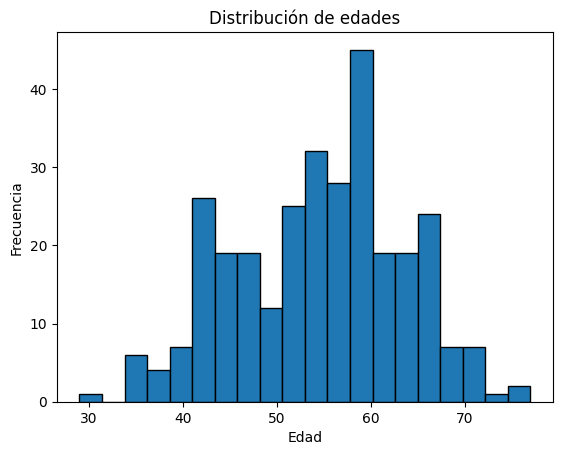

In [130]:
# Histograma simple
df["age"].plot(kind='hist', bins=20, edgecolor='black')
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


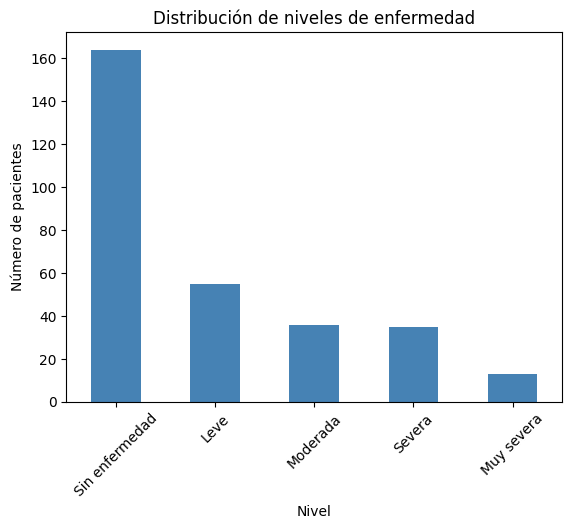

In [131]:
# Gráfico de barras
df["nivel_enfermedad"].value_counts().plot(kind='bar', color='steelblue')
plt.title("Distribución de niveles de enfermedad")
plt.xlabel("Nivel")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45)
plt.show()


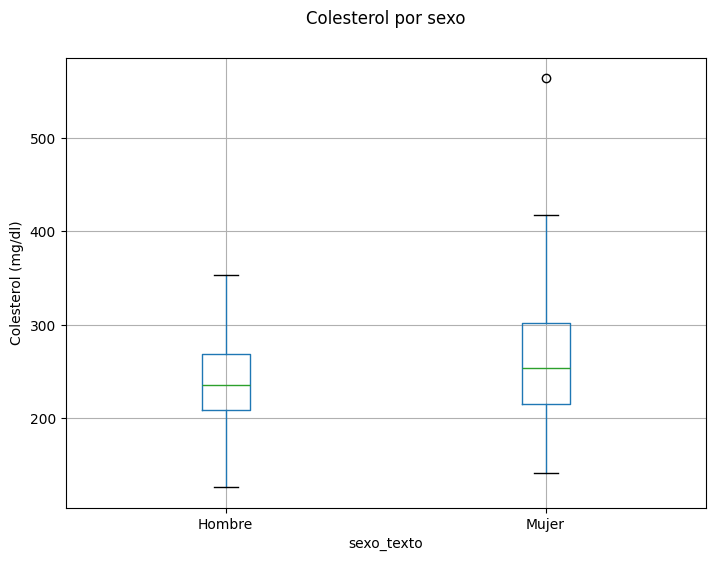

In [132]:
# Box plot para ver distribución y outliers
df.boxplot(column='chol', by='sexo_texto', figsize=(8, 6))
plt.suptitle("Colesterol por sexo")
plt.title("")
plt.ylabel("Colesterol (mg/dl)")
plt.show()


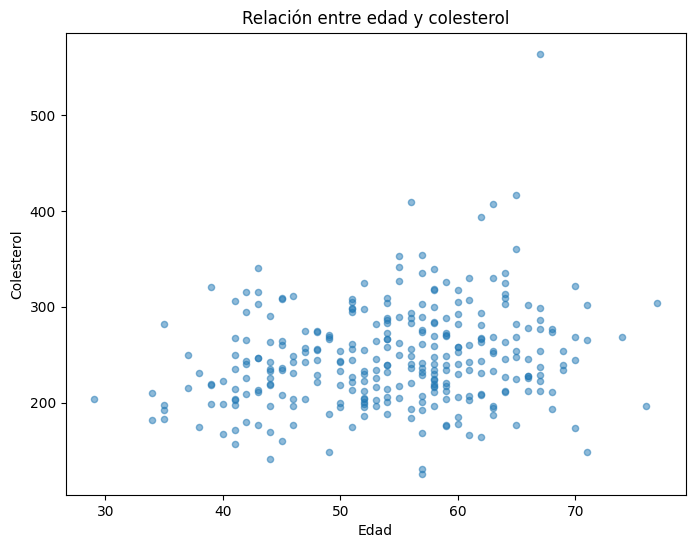

In [133]:
# Scatter plot para ver relaciones
df.plot(kind='scatter', x='age', y='chol', alpha=0.5, figsize=(8, 6))
plt.title("Relación entre edad y colesterol")
plt.xlabel("Edad")
plt.ylabel("Colesterol")
plt.show()


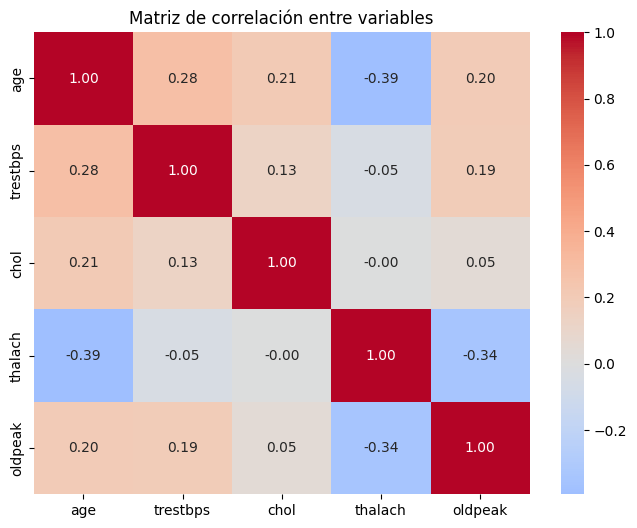

In [134]:
# Matriz de correlación con heatmap
correlacion = df[["age", "trestbps", "chol", "thalach", "oldpeak"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Matriz de correlación entre variables")
plt.show()


/var/folders/hj/z81bpvv52rxg939nrr4_8qp00000gn/T/ipykernel_44967/2677819931.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tendencia = df.groupby("grupo_edad")["chol"].mean().sort_index()


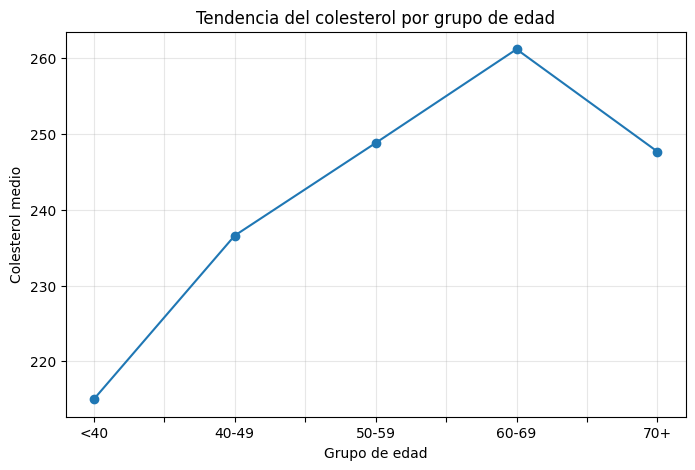

In [135]:
# Gráfico de líneas para tendencias
# Colesterol medio por grupo de edad
tendencia = df.groupby("grupo_edad")["chol"].mean().sort_index()
tendencia.plot(kind='line', marker='o', figsize=(8, 5))
plt.title("Tendencia del colesterol por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Colesterol medio")
plt.grid(True, alpha=0.3)
plt.show()


 ## 9. Guardar los resultados



 Después de procesar los datos, necesitamos guardar los resultados.

In [136]:
# Guardar el DataFrame modificado en CSV
df_limpio.to_csv("heart_disease_procesado.csv", index=False)
print("Archivo guardado como 'heart_disease_procesado.csv'")


Archivo guardado como 'heart_disease_procesado.csv'


In [137]:
# Guardar solo columnas específicas
columnas_importantes = ["age", "sexo_texto", "chol", "categoria_colesterol", "nivel_enfermedad"]
df[columnas_importantes].to_csv("heart_disease_resumido.csv", index=False)
print("Archivo resumido guardado")


Archivo resumido guardado


In [138]:
# Guardar en Excel (requiere openpyxl o xlsxwriter)
# df.to_excel("heart_disease.xlsx", sheet_name="Datos", index=False)

# Guardar tabla de resumen
resumen_sexo = df.groupby("sexo_texto").agg({
    "age": ["mean", "std"],
    "chol": ["mean", "std"],
    "num": lambda x: (x > 0).mean() * 100  # Porcentaje de enfermos
})
print("\nTabla de resumen guardada:")
print(resumen_sexo.round(1))
resumen_sexo.to_csv("resumen_por_sexo.csv")



Tabla de resumen guardada:
             age        chol            num
            mean  std   mean   std <lambda>
sexo_texto                                 
Hombre      53.8  8.8  239.6  42.6     55.3
Mujer       55.7  9.4  261.8  64.9     25.8


 ## Ejercicios propuestos



 1. **Análisis de presión arterial**: Crea una nueva columna que clasifique la presión arterial (`trestbps`) en las siguientes categorías:

    - "Normal": menor a 120

    - "Elevada": entre 120 y 129

    - "Hipertensión Etapa 1": entre 130 y 139

    - "Hipertensión Etapa 2": 140 o más



    Luego calcula qué porcentaje de pacientes está en cada categoría.



 2. **Análisis por sexo**:

    - Calcula la media y desviación estándar del colesterol para hombres y mujeres por separado

    - Determina qué sexo tiene mayor proporción de pacientes con enfermedad cardíaca

    - Crea un gráfico comparativo



 3. **Identificación de pacientes de alto riesgo**:

    - Crea un índice de riesgo que combine edad > 55, colesterol > 240, y presión > 140

    - Identifica cuántos pacientes cumplen con al menos 2 de estos criterios

    - Guarda la lista de pacientes de alto riesgo en un archivo separado



 4. **Análisis de correlaciones**:

    - Investiga qué variables están más correlacionadas con la presencia de enfermedad (`num`)

    - Crea visualizaciones para las 3 correlaciones más fuertes



 5. **Limpieza de datos avanzada**:

    - Identifica posibles valores atípicos (outliers) en colesterol y presión arterial

    - Decide qué hacer con ellos (mantener, eliminar, o transformar)

    - Justifica tu decisión

In [76]:
# Espacio para resolver los ejercicios

# Ejemplo de solución para el ejercicio 1
def clasificar_presion(valor):
    if pd.isna(valor):
        return "Desconocido"
    elif valor < 120:
        return "Normal"
    elif valor < 130:
        return "Elevada"
    elif valor < 140:
        return "Hipertensión Etapa 1"
    else:
        return "Hipertensión Etapa 2"

df["categoria_presion"] = df["trestbps"].apply(clasificar_presion)
print("Distribución de categorías de presión arterial:")
print(df["categoria_presion"].value_counts())
print("\nPorcentajes:")
print(df["categoria_presion"].value_counts(normalize=True) * 100)


Distribución de categorías de presión arterial:
categoria_presion
Hipertensión Etapa 2    98
Elevada                 75
Hipertensión Etapa 1    70
Normal                  60
Name: count, dtype: int64

Porcentajes:
categoria_presion
Hipertensión Etapa 2    32.343234
Elevada                 24.752475
Hipertensión Etapa 1    23.102310
Normal                  19.801980
Name: proportion, dtype: float64


 ## Resumen



 En este notebook hemos cubierto las operaciones fundamentales de pandas:



 - **Carga y exploración inicial**: Entender la estructura y contenido de los datos

 - **Selección y filtrado**: Acceder a subconjuntos específicos de datos

 - **Transformación**: Crear nuevas variables y modificar existentes

 - **Análisis estadístico**: Calcular métricas y encontrar patrones

 - **Agrupación**: Resumir datos por categorías

 - **Visualización**: Crear gráficos para entender mejor los datos

 - **Exportación**: Guardar los resultados del análisis



 Estos conceptos forman la base para cualquier análisis de datos con Python y pandas. La práctica constante con diferentes datasets te ayudará a dominar estas herramientas.